# Elbow Method & Silhouette Score for K selection 

- Customer Segmentation Dataset

### Step 1: Import necessary libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from scipy.stats  import zscore

### Step 2: Load and preprocess the data

In [11]:
data = pd.read_csv('customer_segmentation.csv')

data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [12]:
# Drop non-numeric and irrelevant columns (e.g., ID, Gender, etc.)
data = data.drop(columns=['ID', 'Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 
                          'Var_1', 'Segmentation'])


In [13]:
data.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,NaN,3.0
2,67,1.0,1.0
3,67,0.0,2.0
4,40,NaN,6.0


In [14]:
# Drop rows with missing values (NaN)
data = data.dropna()

### Step 3: Scale the data (if needed)

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [16]:
data_scaled_df = pd.DataFrame(data_scaled,columns=data.columns)
data_scaled_df

,Age,Work_Experience,Family_Size
0,-1.294208,-0.476299,0.753491
1,1.418671,-0.476299,-1.198976
2,1.418671,-0.771739,-0.548154
3,0.755523,-0.771739,-0.548154
4,-0.691346,-0.476299,0.102669
...,...,...,...
9231,-0.510488,-0.476299,-0.548154
9232,-0.872205,1.887218,0.753491
9233,-0.510488,-0.476299,-1.198976
9234,0.212947,-0.476299,1.404313


### Step 4: Apply K-Means for Various K Values


In [17]:
inertia_values = []
silhouette_scores = []
K_range = range(2, 11)  # You can adjust the range as needed

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(data_scaled)
    
    # Inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)

### Step 5: Elbow Method

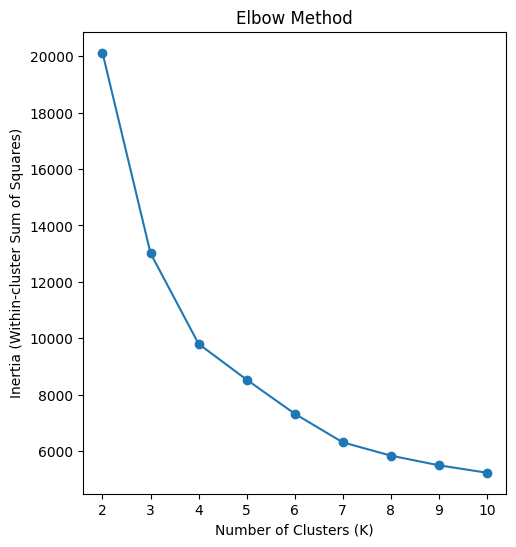

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

### Step 6: Silhouette Score

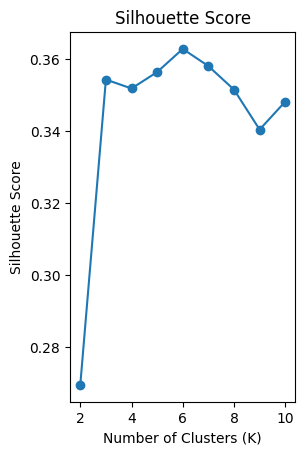

In [19]:
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

### Step 8: Interpretation

In [20]:
# Find the K value from the Elbow Method
elbow_K = 3  # Replace with the K value where you observe the "elbow" in the plot

# Find the K value from the Silhouette Score
silhouette_K = 4  # Replace with the K value that maximizes the Silhouette Score

# Print the selected K values
print(f"Selected K value from Elbow Method: {elbow_K}")
print(f"Selected K value from Silhouette Score: {silhouette_K}")


Selected K value from Elbow Method: 3
Selected K value from Silhouette Score: 4


In [21]:
'''You can use either the K value from the Elbow Method or the Silhouette Score, based on your preference and
the characteristics of the dataset'''

'You can use either the K value from the Elbow Method or the Silhouette Score, based on your preference and\nthe characteristics of the dataset'